Import Necessary Libraries

In [2]:
import numpy as np                 
import pandas as pd                 
import matplotlib.pyplot as plt     
import seaborn as sns  

In [3]:
togo = r"C:\Users\hp\Desktop\10Acedamy\week_0\Data\solar-togo.csv"
data = pd.read_csv(togo, encoding='latin1') 
data.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_12876\2704193199.py:2: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(togo, encoding='latin1')


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,GHIrsi,Comments
0,yyyy-mm-dd hh:mm,W/m²,W/m²,W/m²,W/m²,W/m²,°C,%,m/s,m/s,m/s,°N (to east),°,hPa,1 or 0,mm/min,°C,°C,W/m²,NaN
1,2021-10-25 00:01,-1.3,0,0,0,0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0,24.7,24.4,0,NaN
2,2021-10-25 00:02,-1.3,0,0,0,0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0,24.7,24.4,0,NaN
3,2021-10-25 00:03,-1.3,0,0,0,0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0,24.7,24.4,0,NaN
4,2021-10-25 00:04,-1.2,0,0,0,0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0,24.7,24.4,0,NaN


Data Exploration and Visualization

In [4]:
data.tail()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,GHIrsi,Comments
525596,2022-10-24 23:56,-0.8,0.0,0.0,0.0,0.0,25.2,53.8,0.0,0.0,0.0,0.0,0.0,977,0,0,24.3,24.0,0.0,NaN
525597,2022-10-24 23:57,-0.9,0.0,0.0,0.0,0.0,25.3,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0,24.3,24.0,0.0,NaN
525598,2022-10-24 23:58,-1.0,0.0,0.0,0.0,0.0,25.3,53.4,0.0,0.0,0.0,0.0,0.0,977,0,0,24.2,23.9,0.0,NaN
525599,2022-10-24 23:59,-1.1,0.0,0.0,0.0,0.0,25.4,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0,24.1,23.8,0.0,NaN
525600,2022-10-25 00:00,-1.2,0.0,0.0,0.0,0.0,25.4,52.3,0.0,0.0,0.0,0.0,0.0,977,0,0,24.1,23.8,0.0,NaN


In [5]:
data.shape

(525601, 20)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525601 entries, 0 to 525600
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525601 non-null  object 
 1   GHI            525601 non-null  object 
 2   DNI            525601 non-null  object 
 3   DHI            525601 non-null  object 
 4   ModA           525601 non-null  object 
 5   ModB           525601 non-null  object 
 6   Tamb           525601 non-null  object 
 7   RH             525601 non-null  object 
 8   WS             525601 non-null  object 
 9   WSgust         525601 non-null  object 
 10  WSstdev        525601 non-null  object 
 11  WD             525601 non-null  object 
 12  WDstdev        525601 non-null  object 
 13  BP             525601 non-null  object 
 14  Cleaning       525601 non-null  object 
 15  Precipitation  525601 non-null  object 
 16  TModA          525601 non-null  object 
 17  TModB          525601 non-nul

In [7]:
data.describe()

,Comments
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [8]:
data.isnull().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
GHIrsi                0
Comments         525601
dtype: int64

In [ ]:
data.isna().sum()

In [9]:
data.dtypes

Timestamp         object
GHI               object
DNI               object
DHI               object
ModA              object
ModB              object
Tamb              object
RH                object
WS                object
WSgust            object
WSstdev           object
WD                object
WDstdev           object
BP                object
Cleaning          object
Precipitation     object
TModA             object
TModB             object
GHIrsi            object
Comments         float64
dtype: object

In [10]:
columns_to_check_positive = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

negative_values_count = {
    col: (pd.to_numeric(data[col], errors='coerce') < 0).sum()
    for col in columns_to_check_positive if col in data.columns
}
negative_values_count

{'GHI': 257385, 'DNI': 0, 'DHI': 0, 'ModA': 0, 'ModB': 0, 'WS': 0, 'WSgust': 0}

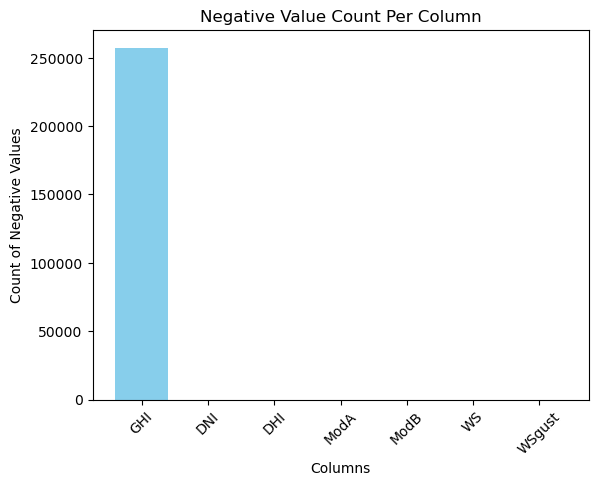

In [11]:
plt.bar(negative_values_count.keys(), negative_values_count.values(), color='skyblue')
plt.xlabel('Columns')
plt.ylabel('Count of Negative Values')
plt.title('Negative Value Count Per Column')
plt.xticks(rotation=45)
plt.show()


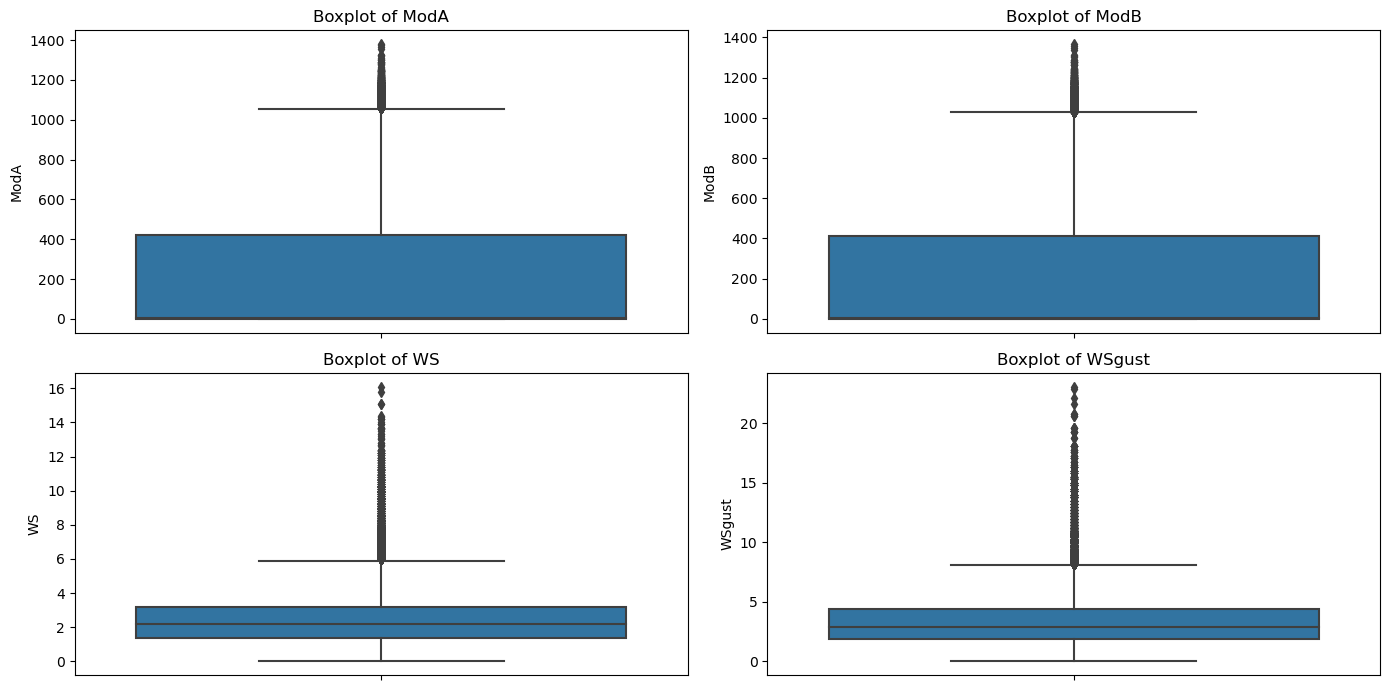

In [ ]:
columns_to_check_outliers = ['ModA', 'ModB', 'WS', 'WSgust']

data[columns_to_check_outliers] = data[columns_to_check_outliers].apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(14, 7))
for i, col in enumerate(columns_to_check_outliers, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=data[col])  # Use 'y' to plot vertical boxplots
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [18]:
corr_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr_data = data[corr_columns].corr()
data[corr_columns] = data[corr_columns].apply(pd.to_numeric, errors='coerce')
print(data[corr_columns].isna().sum())  # Check for any NaNs
data[corr_columns] = data[corr_columns].fillna(data[corr_columns].mean()) 
plt.figure(figsize=(10, 8))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, linewidths=0.5)
plt.title('Correlation Matrix: Solar Radiation Components and Temperature Measures')
plt.show()



C:\Users\hp\AppData\Local\Temp\ipykernel_12876\403377732.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_data = data[corr_columns].corr()


GHI      1
DNI      1
DHI      1
TModA    1
TModB    1
dtype: int64


ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1000x800 with 0 Axes>